<a href="https://colab.research.google.com/github/Ly-Mark/Data601_Project/blob/main/FInal__DF_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install icecream

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from icecream import ic
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import string
from sklearn.metrics import confusion_matrix
import nltk
from sklearn.decomposition import PCA
import icecream as ic
import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sph
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn as sk
import sklearn.cluster as skc
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.estimator_checks import check_estimator
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from icecream import ic
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from tqdm.notebook import tqdm
from sklearn.ensemble import RandomForestClassifier
#from matplotlib.pyplot import feature_importances_
from sklearn import pipeline
#!pip install matplotlib-feature_importances_
from sklearn.inspection import permutation_importance
import seaborn as sns

In [ ]:
df=pd.read_csv("dfaftercleaning.csv")

In [ ]:
#df_pca
df_pcas=df[df["G"]>40]
df_pcas.columns
df_pcas=df_pcas.reset_index()
df_pcas.drop(['Unnamed: 0',"index"],  axis=1, inplace=True)

Here we are removing players who have played less than 40 games as we dont want them to have high stats with less number of games but getting clustered into a group with elite performers when they have most likely have got those stats by playing very less games in that season.

Shooting Gaurd.

In [ ]:
df_pcas=df_pcas[df_pcas['Pos']=='SG']
df_pcas=df_pcas.reset_index()
df_pcas.drop("index",axis=1,inplace=True)

In [ ]:
df_pca_labels=df_pcas[['PLAYER', 'Pos', 'Age', 'Tm', 'G','Year','TEAM', 'WEIGHT', 'COLLEGE', 'COUNTRY', 'DRAFT YEAR',
       'DRAFT ROUND', 'DRAFT NUMBER','Height']]

In [ ]:
df_pca = df_pcas.drop(df_pca_labels.columns,axis=1)
df_pca.head(5)

,three_pt_pct,two_pt_pct,eFG%,FT%,PF,3P/G,2P/G,ORB/G,DRB/G,AST/G,STL/G,BLK/G,TOV/G,NETRTG,TS_pct
0,0.000,0.497,0.497,0.657,205,0.000000,6.146341,3.121951,6.146341,2.085366,1.109756,0.573171,2.024390,-5.2,52.7
1,0.000,0.483,0.479,0.751,207,0.000000,5.231707,2.439024,4.365854,1.109756,0.500000,1.365854,1.829268,5.3,51.8
2,0.143,0.474,0.471,0.728,164,0.012195,3.195122,1.048780,3.719512,0.987805,0.317073,0.195122,1.317073,-4.8,51.6
3,0.333,0.487,0.487,0.858,190,0.024390,4.268293,1.963415,3.768293,1.060976,0.439024,0.865854,1.243902,-3.5,53.5
4,0.386,0.421,0.523,0.870,87,0.804878,0.487805,0.390244,1.963415,0.695122,0.585366,0.280488,0.402439,-3.1,55.5


We will scale the data next to perform pca

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_pca = scale.fit_transform(df_pca)
scaled_pca= pd.DataFrame(scaled_pca)
scaled_pca
scaled_pca.columns = [df_pca[:0]]
scaled_pca.head(5)

,three_pt_pct,two_pt_pct,eFG%,FT%,PF,3P/G,2P/G,ORB/G,DRB/G,AST/G,STL/G,BLK/G,TOV/G,NETRTG,TS_pct
0,0.676937,0.439900,0.961067,0.540193,1.163011,1.684680,0.183114,0.349268,0.557858,0.176093,0.267706,-0.479374,0.042475,-0.266259,0.871265
1,-0.458898,0.092090,-0.545698,-0.058965,1.618573,-0.639259,2.183090,-0.153699,0.801533,2.600595,2.244755,0.122330,2.603684,-0.056287,-0.979816
2,0.063947,0.526852,0.267477,0.821430,2.312761,2.300876,1.932142,0.813545,3.122861,3.848241,2.183922,1.994297,4.433118,0.381156,1.419733
3,0.604821,0.265995,0.363144,0.002173,1.531799,0.311443,0.685009,-0.579287,0.083333,0.653915,0.054793,-0.278806,0.790880,-0.983666,0.277091
4,-0.188461,0.135566,-0.282612,0.161134,0.533903,0.117782,0.707822,0.658786,2.853536,0.229184,0.115626,1.192026,0.524781,-0.441236,-0.019996


In [ ]:
len(scaled_pca.columns)

15

We have 15 dimensions for each player.

In [ ]:
#scaled_pca_SG=scaled_pca_SG.to_numpy()
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)

principle_components = pca.fit_transform(scaled_pca)

pca.explained_variance_ratio_.cumsum()
#len(principle_components)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



array([0.35519138, 0.53580636, 0.64134646, 0.70917009, 0.7704234 ,
       0.81340428, 0.85113551, 0.88464051, 0.91472053, 0.93839078])

We can see that if we take only one PCA, we are accouting for 35 percent variation, whereas if we take 10 PC's we are accounting for 93 percent of total variation.

The below code allows us to append in a list which dimensions in our original dataset contribute to a particular  prinicpal component

In [ ]:
loading_scores_all = []
n_pca=[0,1,2]
#print(p)
for p in n_pca:
  loading_scores = pd.Series(pca.components_[p], index=scaled_pca.columns)
  #print(loading_scores)
  ## now sort the loading scores based on their magnitude
  sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

  # get the names of the top 10 genes
  top_10_traits = sorted_loading_scores[0:10].index.values

  loading_scores_all.append(loading_scores[top_10_traits].to_dict())

pca = pd.DataFrame(principle_components)
pca.columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10']
pca.dropna(inplace=True)

Concat the pca components with the labels which indicates which players stats they represent.

In [ ]:
df_after_pca = pd.concat([pca, df_pca_labels], axis = 1)
#df_after_pca

In [ ]:
df_after_pca["zeroed"]=0
fig = px.scatter(df_after_pca, x= df_after_pca["pc1"], y= df_after_pca["zeroed"] ,hover_data=['PLAYER','Year'])
fig.show()

When reducing to one dimension a single player does stand out. James Harden's 2018, 2016 and 2014 seasons are all stand alone seperate from the other players. Generally, our one-dimensional does a fairly good job at seperating the good players from the bad players. James Harden, Bradley Beal, Demar Derozan etc. are all towards the front while towards the end there are players like Lance Stephenson and Orlando Johsnon. These are players that were never near an all-star or all-nba caliber. However, there is probably a lot of information and nuance that is being lossed in translation. Consequently, we are going to look at the shooting guards from more dimensions.


Along with finding the best players we also want to find the players who are similar. So, we want to implement k-means clustering along with PCA to get the players who are similar and at the same time find the best players for that position through the graph. We also want to compare how the clustering changes as we increase the dimensions by taking more principal components each step. We want to do clustering for PC1 alone first and then consider 2, consider 3 and consider 10. As we saw above that PC1 alone accounts for only 35 percentof total variation. Whereas if we take 10 principal components we are accounting for more 90 percent of total variation

So, through next step we want to find the number of clusters that need to be taken into consideration, when we run it for 1,3 and 10 components.

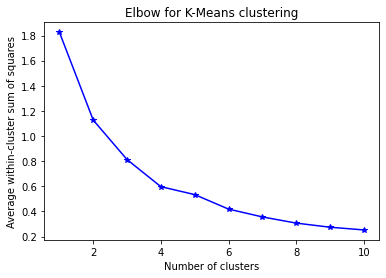

In [ ]:
#@title To find no of clusters with only one principal component

X=pca.iloc[:,0:1] # Using the the dataset of Section 1
K = range(1,11)  # Apply kmeans 1 to 10
kmeans_models = [skc.KMeans(k).fit(X) for k in K]
centroids = [m.cluster_centers_ for m in kmeans_models]
D_k = [spd.cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

# plot elbow curve
plt.plot(K, avgWithinSS, 'b*-')
plt.xlabel('Number of clusters');
plt.ylabel('Average within-cluster sum of squares');
plt.title('Elbow for K-Means clustering');

We are choosing the no of clusters to be based on elbow point 4.

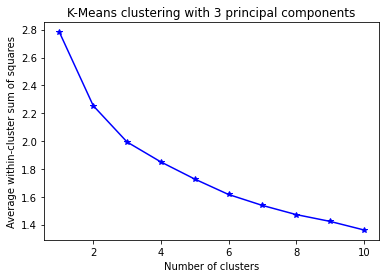

In [ ]:
#@title To find no of clusters with only three principal components
X=pca.iloc[:,0:3] # Using the the dataset of Section 1
K = range(1,11)  # Apply kmeans 1 to 10
kmeans_models = [skc.KMeans(k).fit(X) for k in K]
centroids = [m.cluster_centers_ for m in kmeans_models]
D_k = [spd.cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

# plot elbow curve
plt.plot(K, avgWithinSS, 'b*-')
plt.xlabel('Number of clusters');
plt.ylabel('Average within-cluster sum of squares');
plt.title('K-Means clustering with 3 principal components');

We are choosing the no of clusters to be 5 for 3 principal components as there is no clear elbow point and average within cluster distance decreases from 4 to 5.

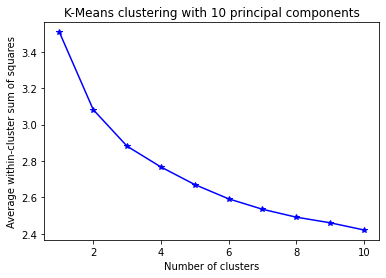

In [ ]:
#@title To find no of clusters with 10 principal components
X=pca.iloc[:,0:10] # Using the the dataset of Section 1
K = range(1,11)  # Apply kmeans 1 to 10
kmeans_models = [skc.KMeans(k).fit(X) for k in K]
centroids = [m.cluster_centers_ for m in kmeans_models]
D_k = [spd.cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

# plot elbow curve
plt.plot(K, avgWithinSS, 'b*-')
plt.xlabel('Number of clusters');
plt.ylabel('Average within-cluster sum of squares');
plt.title('K-Means clustering with 10 principal components');

We are choosing the no of clusters to be 5 for 10 principal components as there is no clear elbow point and average within cluster distance decreases from 4 to 5.

By evaluating the graph we can conclude that 4 or 5 clusters is the correct number.

The below code does k-means clustering on one principal component to find index which will be used to automate the clustering on all princpal components and store them in a dataframe

In [ ]:
#@title k-means clustering with one principal component to find index.
df_pc_only=df_after_pca.iloc[:,0:1]
#print(df_pc_only)
#df_pc_only=clean_dataset(df_pc_only)
kmeans_model = skc.KMeans(n_clusters=4,init='k-means++',random_state=42)
#kmeans_model = skc.KMeans(n_clusters=5,init='k-means++',random_state=42)

kmeans_model.fit(df_pc_only)
centroids = kmeans_model.cluster_centers_
centroids
df_pc_only['cluster_labels_kmeans'] = kmeans_model.labels_
df_cluster = pd.concat([df_pc_only, df_pca_labels], axis = 1)

print(df_cluster[(df_cluster['PLAYER']=="James Harden") & (df_cluster["Year"]==2018)]["PLAYER"])

213    James Harden
Name: PLAYER, dtype: object


In [ ]:
index=213

index=213

This is because we want to compare how clustering is done in comparision as we increase the dimensions and for that cluster labels should remain same, but when we implement k-means it randomly sets cluster labels. To allow us to compare how clustering is done across the dimensions. we are taking the best players index and setting it to get the cluster name constant for each iteration where we immplement clustering for one principal component and next two and so on.

In [ ]:
#@title Clustering code for multiple dimensions

import sklearn as sk
import sklearn.cluster as skc

labels_dict={1: [],2: [], 3: [], 10: []}
pca_comp=[1,2,3,10]
finder_constant=0
n=4
for p in pca_comp:
  #print(n)
  df_pc_only=df_after_pca.iloc[:,0:p]
  kmeans_model = skc.KMeans(n_clusters=n,init='k-means++',random_state=42)
  kmeans_model.fit(df_pc_only)
  centroids = kmeans_model.cluster_centers_
  labels = list(kmeans_model.labels_)
  if p==1:
    label_top=labels[index]
    finder_constant=label_top
  else:
    label_top_1=labels[index]
    changer= {0:0,1:1,2:2,3:3,4:4,5:5}
    changer[label_top_1]=label_top
    changer[label_top]=label_top_1
    #print(changer)
    labels= [changer[a] for a in labels]
  labels_dict[p] = labels
  if p==1:
    n=n+1

In [ ]:
#@title additional code for storing the cluster labels for multiple scenarios in a dataframe
labels_components=pd.DataFrame(labels_dict)
labels_components.columns=["comp_1","comp_2","comp_3","comp_10"]
df_cluster = pd.concat([df_pc_only,labels_components, df_pca_labels], axis = 1)
df_cluster["player-year-tm"] = df_cluster["PLAYER"] + "-" + df_cluster["Year"].astype(str) + "-" + df_cluster["Tm"]
df_cluster['comp_1'] = df_cluster['comp_1'].astype(str)
df_cluster['comp_2'] = df_cluster['comp_2'].astype(str)
df_cluster['comp_3'] = df_cluster['comp_3'].astype(str)
df_cluster['comp_10'] = df_cluster['comp_10'].astype(str)
finder_constant = str(finder_constant)
comp_1_players=df_cluster[df_cluster["comp_1"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_2_players=df_cluster[df_cluster["comp_2"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_3_players=df_cluster[df_cluster["comp_3"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_10_players=df_cluster[df_cluster["comp_10"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()

**Comparing most productive shooting gaurd cluster with only one principal componet, 3 principal components and 10 components.**

In [ ]:
set(comp_1_players) - set(comp_10_players)

{'Avery Bradley-2017-BOS',
 'Danny Green-2014-SAS',
 'Giannis Antetokounmpo-2014-MIL',
 'Jimmy Butler-2014-CHI',
 'Patrick Beverley-2017-HOU',
 'Paul George-2011-IND'}

clustering with only one principal component considered these players along with their respective seasons to be most productive even though when they are not.

In [ ]:
set(comp_10_players) - set(comp_1_players)

{'Andre Miller-2011-DEN',
 'DeMar DeRozan-2014-TOR',
 'Joe Johnson-2010-ATL',
 'Kent Bazemore-2018-ATL',
 'Nicolas Batum-2018-CHO',
 'O.J. Mayo-2012-DAL'}

These players with respective seasons were not included in the cluster with only one principal component.

In [ ]:
set(comp_3_players) - set(comp_10_players)

{'Avery Bradley-2017-BOS',
 'Jimmy Butler-2014-CHI',
 'Marcus Smart-2017-BOS',
 'Patrick Beverley-2017-HOU',
 'Paul George-2011-IND',
 'Will Barton-2016-DEN'}

clustering with three principal component considered these players  respective seasons to be most productive even though they are not.

In [ ]:
set(comp_10_players) - set(comp_3_players)

set()

clustering with three principal components didn't miss any of the players with their best seasons which are there in the clustering with ten dimensions.

K-means with 3 pca, it considered four players on the boundaries who are not best players in the cluster. While it missed none, as we increase the pca's the total variation increases and the k-means moves closer to the actual shape. So, even with 3 pca's we are getting decent results for shooting gaurd position beacuse of the better seperation of the most productive players from the rest in the three



Visualization can be modified in the below graph accordingly to see how clusters are formed with single component alone, three principal components and ten by just changing the color parameter's value df_cluster['comp_3'] with df_cluster['comp_1'] or df_cluster[comp_10]. Here we are showing the clusters formed with three as we are able to obtain good cluster with just three principal components.

In [ ]:

fig = px.scatter_3d(
    df_cluster, x= df_cluster["pc1"], y=df_cluster["pc2"], z=df_cluster["pc3"], color=df_cluster['comp_3'],
    title=f'k-means Clustering after dimensionality reduction',
    hover_name=df_cluster['player-year-tm']
)


fig.show()

In the graph above there are five clusters graphed along the 3 principal component analysis (PCA). Just by looking  at the names of the players, it is evident that the red colored players along the right side of the graph represent the most productive or acclaimed players. Players such as James Harden, Jimmy Butler and Jrue Holiday are all former all-stars and are represented in red. When juxtaposed with Lance Stephenson and other players in the far left orange cluster there is clearly a drop in quality.

Continuing, the light green cluster contains high-level defenders at the shooting guard position that are not scoring threats. This includes NBA players such as Andre Roberson (a notoriously bad offensive player but overall fantastic defensive player), Tony Allen and Robert Convigton. On the opposite end, the purple cluster contains efficient shooters that cannot scale their shooting with higher volume. Kyle Korver and Joe Harris are the highlights of this cluster. Finally, the blue cluster seems to be a combination of the defenders from the green cluster and the shooters from the purple.   

While James Harden seems to be the clear favorite, it is essential to understand what the three PCAs represent to pick the most productive player for that position.  

In [ ]:

for a in n_pca:
  print(f'pc{a+1}')
  print(pd.Series(loading_scores_all[a]))
  print()
  print()


pc1
TOV/G     0.368940
DRB/G     0.362278
AST/G     0.354445
STL/G     0.354182
2P/G      0.351335
PF        0.329567
ORB/G     0.269538
BLK/G     0.264837
3P/G      0.201633
TS_pct    0.144576
dtype: float64


pc2
eFG%            0.512879
three_pt_pct    0.472119
TS_pct          0.394679
3P/G            0.389518
FT%             0.240540
ORB/G          -0.178923
two_pt_pct      0.172598
NETRTG          0.170344
2P/G           -0.138349
STL/G          -0.126602
dtype: float64


pc3
FT%          -0.475532
two_pt_pct    0.455735
ORB/G         0.334515
TOV/G        -0.274543
NETRTG        0.268412
eFG%          0.252658
AST/G        -0.251772
BLK/G         0.251650
3P/G         -0.237112
2P/G         -0.163930
dtype: float64




The higher the players are in PC1 the better they perform in AST/G, 2P/G, BLK/G and 3P/G. This group primarily represents total volume statistics. There are no metrics  regarding shooting percentages or efficiency.

The higher players are in PC2 the more efficient the player. This is represented by stats such as true-shooting percentage, two-point percentage, three-point percentage etc.  

Finally, the higher players are in PC3 the worst they are in shooting volume (negative values for 3P/G and 2P/G) and ball-handling volvume (AST/G).



Overall, James Harden's 2018 season is our choice for most productive shooting guard season in our dataset. Below we will detail his PCA values:


*   PC1: 8.1
*   PC2: 1.8
*   PC3: 1.3


His PC1 value of 8.1 is the highest of any player on list. It highlights his ability to run an offense on high volvume. Furthermore, his PC2 was the highest of those four seasons of his clustered to the right. Indicating that his volume and efficiency peaked at the same time which is very rare. Usually, productivity comes at the cost of efficiency.     

Position- Center

We repeated the same above process with every other position. So, we are hiding all the code cells for this position to just show the results of how many principal components we selected to do clustering on.


In [ ]:
#@title Code for Position Center
df=pd.read_csv("dfaftercleaning.csv")

df_pcas=df[df["G"]>40]
df_pcas.columns
df_pcas=df_pcas.reset_index()
df_pcas.drop(['Unnamed: 0',"index"],  axis=1, inplace=True)
df_pcas=df_pcas[df_pcas['Pos']=='C']
df_pcas=df_pcas.reset_index()
df_pcas.drop("index",axis=1,inplace=True)
df_pca_labels=df_pcas[['PLAYER', 'Pos', 'Age', 'Tm', 'G','Year','TEAM', 'WEIGHT', 'COLLEGE', 'COUNTRY', 'DRAFT YEAR',
       'DRAFT ROUND', 'DRAFT NUMBER','Height']]
df_pca = df_pcas.drop(df_pca_labels.columns,axis=1)
df_pca
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_pca = scale.fit_transform(df_pca)
scaled_pca= pd.DataFrame(scaled_pca)
scaled_pca
scaled_pca.columns = [df_pca[:0]]
scaled_pca.head(5)
len(scaled_pca.columns)
#We have 15 dimensions for each player.
#scaled_pca_SG=scaled_pca_SG.to_numpy()
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)

principle_components = pca.fit_transform(scaled_pca)

pca.explained_variance_ratio_.cumsum()
#len(principle_components)
loading_scores_all = []
n_pca=[0,1,2]
#print(p)
for p in n_pca:
  loading_scores = pd.Series(pca.components_[p], index=scaled_pca.columns)
  #print(loading_scores)
  ## now sort the loading scores based on their magnitude
  sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

  # get the names of the top 10 genes
  top_10_traits = sorted_loading_scores[0:10].index.values

  loading_scores_all.append(loading_scores[top_10_traits].to_dict())

pca = pd.DataFrame(principle_components)
pca.columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10']
pca.dropna(inplace=True)
pca
df_after_pca = pd.concat([pca, df_pca_labels], axis = 1)
#df_after_pca
df_after_pca["zeroed"]=0
fig = px.scatter(df_after_pca, x= df_after_pca["pc1"], y= df_after_pca["zeroed"] ,hover_data=['PLAYER','Year'])
fig.show()

df_pc_only=df_after_pca.iloc[:,0:1]
#print(df_pc_only)
#df_pc_only=clean_dataset(df_pc_only)
kmeans_model = skc.KMeans(n_clusters=4,init='k-means++',random_state=42)
#kmeans_model = skc.KMeans(n_clusters=5,init='k-means++',random_state=42)

kmeans_model.fit(df_pc_only)
centroids = kmeans_model.cluster_centers_
centroids
df_pc_only['cluster_labels_kmeans'] = kmeans_model.labels_
df_cluster = pd.concat([df_pc_only, df_pca_labels], axis = 1)

print(df_cluster[(df_cluster['PLAYER']=="DeMarcus Cousins") & (df_cluster["Year"]==2018)]["PLAYER"])


index=314
#we are taking the a player's index who is farthest on pca1 and setting it to get the cluster name constant for each iteration where we take only one principal component and next two and son on.
index=314
import sklearn as sk
import sklearn.cluster as skc

labels_dict={1: [],2: [], 3: [], 10: []}
pca_comp=[1,2,3,10]
finder_constant=0
n=4
for p in pca_comp:
  #print(n)
  df_pc_only=df_after_pca.iloc[:,0:p]
  kmeans_model = skc.KMeans(n_clusters=n,init='k-means++',random_state=42)
  kmeans_model.fit(df_pc_only)
  centroids = kmeans_model.cluster_centers_
  labels = list(kmeans_model.labels_)
  if p==1:
    label_top=labels[index]
    finder_constant=label_top
  else:
    label_top_1=labels[index]
    changer= {0:0,1:1,2:2,3:3,4:4,5:5}
    changer[label_top_1]=label_top
    changer[label_top]=label_top_1
    #print(changer)
    labels= [changer[a] for a in labels]
    #print(p)
    #print(labels)
  labels_dict[p] = labels
  if p==1:
    n=n+1
labels_components=pd.DataFrame(labels_dict)
labels_components.columns=["comp_1","comp_2","comp_3","comp_10"]
df_cluster = pd.concat([df_pc_only,labels_components, df_pca_labels], axis = 1)
df_cluster["player-year-tm"] = df_cluster["PLAYER"] + "-" + df_cluster["Year"].astype(str) + "-" + df_cluster["Tm"]
df_cluster['comp_1'] = df_cluster['comp_1'].astype(str)
df_cluster['comp_2'] = df_cluster['comp_2'].astype(str)
df_cluster['comp_3'] = df_cluster['comp_3'].astype(str)
df_cluster['comp_10'] = df_cluster['comp_10'].astype(str)
finder_constant = str(finder_constant)

comp_1_players=df_cluster[df_cluster["comp_1"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_2_players=df_cluster[df_cluster["comp_2"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_3_players=df_cluster[df_cluster["comp_3"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_10_players=df_cluster[df_cluster["comp_10"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



314    DeMarcus Cousins
Name: PLAYER, dtype: object


Looking at centers from one-dimension our best player was Dwight Howard. However, he was not nearly as prohibitively greater than other centers as James Harden was for SGs. In fact Demarcus Cousins in 2018 was only .04 less. Once again, our one-dimension reduction is fairly good at seperating the good from the bad players. Some of the other highlights of the top tier players with a high PC1 value are Joel Embiid, Andre Drummond and Anthony Davis.

**Comparing most productive Center cluster with only one principal componet, 3 principal components and 10 components.**


In [ ]:
len(set(comp_10_players) - set(comp_1_players))

65

In [ ]:
len(set(comp_1_players)-set(comp_10_players))

23

Clustering on Principal component one is not  good as there are lot of missing players from it when compared to the ones formed with ten players.

In [ ]:
set(comp_3_players) - set(comp_10_players)

{'Dewayne Dedmon-2019-ATL', 'Kevin Love-2018-CLE', 'Pau Gasol-2017-SAS'}

In [ ]:
len(set(comp_10_players) - set(comp_3_players))

34

Clustering with 3 principal components when compared with that of ten, we are missing 34 player's seasons which can be considered to be most productive. So choosing 3 pricipal components may not be good ideas as we are not getting clear separation of clusters with 3 alone for centers. So we will produce visualizations for clusterning done on ten principal components to be mapped to 3 dimensions using the below code.

In [ ]:


fig = px.scatter_3d(
    df_cluster, x= df_cluster["pc1"], y=df_cluster["pc2"], z=df_cluster["pc3"], color=df_cluster['comp_10'],
    title=f'k-means Clustering after dimensionality reduction',
    hover_name=df_cluster['player-year-tm']
)


fig.show()

Similar to our analysis regarding SGs there are five clusters in this k-means clustering graph. Also, there does not seem to be as clear of a distinction between the good and bad clusters as with SGs. The blue cluster represents players the new-age centers that are more mobile, better shooters and skilled ball-handlers. The players highlighting this cluster are Demarcus Cousins, Joel Embiid and Anthony Davis. These are all-NBA or all-star level players and universally distnguished as some of the best in their position.

However, in the lower green cluster are Dwight Howard's and Deandre Jordan's (for example) best seasons. Both of whom are also talented. This light green cluster at the bottom represents old-school centers that focused on rebounding and defending and were awful shooters. While the orange cluster seems to be a collection of the worst centers, the blue and red seem to be a mixed bag. This is an interesting trend lines where it is difficult for our model to make meaningful clusters toward the center of the graph.  

In order to find the cause for these players placement and decide our best center season we must look at what the three principal compenents represent.

In [ ]:

for a in n_pca:
  print(f'pc{a+1}')
  print(pd.Series(loading_scores_all[a]))
  print()
  print()


pc1
DRB/G     0.412843
TOV/G     0.383845
2P/G      0.377329
STL/G     0.343585
ORB/G     0.338502
BLK/G     0.318836
PF        0.316714
AST/G     0.272959
NETRTG    0.109784
TS_pct    0.085706
dtype: float64


pc2
two_pt_pct      0.515754
eFG%            0.508437
TS_pct          0.415557
FT%            -0.282496
AST/G          -0.259702
NETRTG          0.193919
TOV/G          -0.176446
3P/G           -0.176344
three_pt_pct   -0.144809
ORB/G           0.121968
dtype: float64


pc3
3P/G            0.537883
three_pt_pct    0.428414
FT%             0.353201
TS_pct          0.296574
ORB/G          -0.292706
AST/G           0.263875
eFG%            0.244928
two_pt_pct      0.215895
PF             -0.169263
NETRTG          0.119988
dtype: float64




PC1: The first Principal Component shows positives for rebounding, blocking and steals. All of these statistics (as shown in our exploratory analysis) represent the prototypical center. This is a player that defends at a high-level and scores a lot of two-pointers on dunks. This makes sense as some of the players highest in PC1 like Dwight Howard embody this player-mold.

PC2: Being higher in this category positively correlates with overall efficiency like True-shooting and Effective Field Goal percentage. However, it negatively correlates with three-point shooting, assists, free-throw percentage etc. This principal component highlights the disadvantages of the average center. Centers usually have bad coordination and are the worse shooting position. Their lacking coordination is also why they are bad at ball-handling and assisting.

PC3: This represents the new-age, advante garde center. Here the player excels at three-point shooting volume and efficiency, free-throw percentage and assists per game. Until recently having a center that could run an offense on the perimiter was unheard of. But, the best centers in todays game break that mold.

Demarcus Cousins' 2018 season will be our best center season from our dataset. This choice, however, is not nearly as clear-cut as the shooting guard position. It comes down to the philosophy of the coach and the needs of the team. Below are his PC values:

*   PC1:  6.0
*   PC2: -3.0
*   PC3: -4.4

Cousins' PC3 value of 4.35 is the highest in the dataset and indicates that he is a highly skilled shooter and ball-handler for his position. This reaffirmed by his low PC2 value. While he may be sacrificing some two-point efficiency and rebounding, we feel it's more than acceptable with his elite playmaking potential. However, some coaches that prefer defense and rebounding may want a center like Howard or even Gobert.  

Position- Small Forward

In [ ]:
#@title Code for Small Forward
df=pd.read_csv("dfaftercleaning.csv")
#df_pca
df_pcas=df[df["G"]>40]
df_pcas.columns
df_pcas=df_pcas.reset_index()
df_pcas.drop(['Unnamed: 0',"index"],  axis=1, inplace=True)
df_pcas=df_pcas[df_pcas['Pos']=='SF']
df_pcas=df_pcas.reset_index()
df_pcas.drop("index",axis=1,inplace=True)
df_pca_labels=df_pcas[['PLAYER', 'Pos', 'Age', 'Tm', 'G','Year','TEAM', 'WEIGHT', 'COLLEGE', 'COUNTRY', 'DRAFT YEAR',
       'DRAFT ROUND', 'DRAFT NUMBER','Height']]
df_pca = df_pcas.drop(df_pca_labels.columns,axis=1)
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_pca = scale.fit_transform(df_pca)
scaled_pca= pd.DataFrame(scaled_pca)
scaled_pca
scaled_pca.columns = [df_pca[:0]]
scaled_pca.head(5)
len(scaled_pca.columns)

#scaled_pca_SG=scaled_pca_SG.to_numpy()
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)

principle_components = pca.fit_transform(scaled_pca)

pca.explained_variance_ratio_.cumsum()
#len(principle_components)
loading_scores_all = []
n_pca=[0,1,2]
#print(p)
for p in n_pca:
  loading_scores = pd.Series(pca.components_[p], index=scaled_pca.columns)
  #print(loading_scores)
  ## now sort the loading scores based on their magnitude
  sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

  # get the names of the top 10 genes
  top_10_traits = sorted_loading_scores[0:10].index.values

  loading_scores_all.append(loading_scores[top_10_traits].to_dict())

pca = pd.DataFrame(principle_components)
pca.columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10']
pca.dropna(inplace=True)
df_after_pca = pd.concat([pca, df_pca_labels], axis = 1)
#df_after_pca
df_after_pca["zeroed"]=0
fig = px.scatter(df_after_pca, x= df_after_pca["pc1"], y= df_after_pca["zeroed"] ,hover_data=['PLAYER','Year'])
fig.show()

X=pca.iloc[:,0:3] # Using the the dataset of Section 1
K = range(1,11)  # Apply kmeans 1 to 10
kmeans_models = [skc.KMeans(k).fit(X) for k in K]
centroids = [m.cluster_centers_ for m in kmeans_models]
D_k = [spd.cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

# plot elbow curve
# plt.plot(K, avgWithinSS, 'b*-')
# plt.xlabel('Number of clusters');
# plt.ylabel('Average within-cluster sum of squares');
# plt.title('Elbow for K-Means clustering');

df_pc_only=df_after_pca.iloc[:,0:1]
#print(df_pc_only)
#df_pc_only=clean_dataset(df_pc_only)
kmeans_model = skc.KMeans(n_clusters=4,init='k-means++',random_state=42)
#kmeans_model = skc.KMeans(n_clusters=5,init='k-means++',random_state=42)

kmeans_model.fit(df_pc_only)
centroids = kmeans_model.cluster_centers_
centroids
df_pc_only['cluster_labels_kmeans'] = kmeans_model.labels_
df_cluster = pd.concat([df_pc_only, df_pca_labels], axis = 1)

print(df_cluster[(df_cluster['PLAYER']=="LeBron James") & (df_cluster["Year"]==2017)]["PLAYER"])
index=171

index=171
import sklearn as sk
import sklearn.cluster as skc

labels_dict={1: [],2: [], 3: [], 10: []}
pca_comp=[1,2,3,10]
finder_constant=0
n=4
for p in pca_comp:
  #print(n)
  df_pc_only=df_after_pca.iloc[:,0:p]
  kmeans_model = skc.KMeans(n_clusters=n,init='k-means++',random_state=42)
  kmeans_model.fit(df_pc_only)
  centroids = kmeans_model.cluster_centers_
  labels = list(kmeans_model.labels_)
  if p==1:
    label_top=labels[index]
    finder_constant=label_top
  else:
    label_top_1=labels[index]
    changer= {0:0,1:1,2:2,3:3,4:4,5:5}
    changer[label_top_1]=label_top
    changer[label_top]=label_top_1
    #print(changer)
    labels= [changer[a] for a in labels]
  labels_dict[p] = labels
  if p==1:
    n=n+1
labels_components=pd.DataFrame(labels_dict)
labels_components.columns=["comp_1","comp_2","comp_3","comp_10"]
df_cluster = pd.concat([df_pc_only,labels_components, df_pca_labels], axis = 1)

df_cluster["player-year-tm"] = df_cluster["PLAYER"] + "-" + df_cluster["Year"].astype(str) + "-" + df_cluster["Tm"]
df_cluster['comp_1'] = df_cluster['comp_1'].astype(str)
df_cluster['comp_2'] = df_cluster['comp_2'].astype(str)
df_cluster['comp_3'] = df_cluster['comp_3'].astype(str)
df_cluster['comp_10'] = df_cluster['comp_10'].astype(str)
finder_constant = str(finder_constant)
comp_1_players=df_cluster[df_cluster["comp_1"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_2_players=df_cluster[df_cluster["comp_2"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_3_players=df_cluster[df_cluster["comp_3"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_10_players=df_cluster[df_cluster["comp_10"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



171    LeBron James
Name: PLAYER, dtype: object


For small forwards LeBron James is at the peak of our graph when looking at one dimension. This is not surprising as he is one of the greatest players of all time. Not far behind, however, are Giannis Antetokounmpo and Kevin Durant. Towards the end of our graph are less known players like Abdel Nader and Earl Clark. Hopefully, the k-means classification along with three dimensions can help differentiate the top tier players.  

Next we will try to find the no of components which is ideal for k-means clustering similar to process done for other positions

In [ ]:
set(comp_1_players) - set(comp_10_players)

{'Khris Middleton-2018-MIL'}

In [ ]:
len(set(comp_10_players) - set(comp_1_players))

22

We shouldn't clustering on PC1 as it missing the most productive seasons of many small forwards.



In [ ]:
set(comp_3_players) - set(comp_10_players)

{'Kawhi Leonard-2013-SAS',
 'Khris Middleton-2018-MIL',
 'Robert Covington-2017-PHI',
 'Robert Covington-2018-PHI'}

In [ ]:
set(comp_10_players) - set(comp_3_players)

{'Andre Iguodala-2011-PHI',
 'Andrei Kirilenko-2010-UTA',
 'Brandon Ingram-2018-LAL',
 'Luol Deng-2011-CHI',
 'Luol Deng-2012-CHI',
 'Tyreke Evans-2013-NOP'}

Here, as we are misclustering only 10 data points we can consider taking the advantage of dimenisionanlity reduction given by 3 PCA alone. Next, we will visualize the clusters formed through

In [ ]:
fig = px.scatter_3d(
    df_cluster, x= df_cluster["pc1"], y=df_cluster["pc2"], z=df_cluster["pc3"], color=df_cluster['comp_3'],
    title=f'k-means Clustering after dimensionality reduction',
    hover_name=df_cluster['player-year-tm']
)


fig.show()

Similar to our previous k-means analysis we have three dimensions and five clusters. Moreso than any other clustering method we have a clear and distinct group of best players. This is represented by the purple cluster on the right. It contains some of the most iconic players ever such as LeBron James, Kevin Durant and Kawhi Leonard. These players are all significant scoring threats, both from three-point and two-point range.

The green cluster that follows the purple contains a combination of players that are competent all-around players without the insane volume/efficiency of the puprle group. Some examples are Gordon Hayward and Khris Middleton. There are also the typical 'three-and-D' players that one might expect to find in abundance at the small-forward position. Below is a blue cluster which has players that are primarily defenders and adequate two-point scorers, but inadequate three-point shooters for the position. The red and orange clusters are very similar but the main difference seems to be that the orange cluster contains worse shooters. We will hone in on what these PCAs represent to fully flesh out and discover the best player at the small-forward position.

In [ ]:

for a in n_pca:
  print(f'pc{a+1}')
  print(pd.Series(loading_scores_all[a]))
  print()
  print()


pc1
DRB/G     0.378383
TOV/G     0.366566
2P/G      0.348135
AST/G     0.345905
STL/G     0.312868
3P/G      0.268668
PF        0.251764
BLK/G     0.251476
ORB/G     0.209485
NETRTG    0.193633
dtype: float64


pc2
three_pt_pct   -0.489387
eFG%           -0.453847
ORB/G           0.352947
TS_pct         -0.351078
3P/G           -0.314935
BLK/G           0.206989
NETRTG         -0.200094
FT%            -0.196070
2P/G            0.176495
TOV/G           0.128623
dtype: float64


pc3
two_pt_pct     -0.608935
FT%             0.447317
eFG%           -0.322655
3P/G            0.284415
TS_pct         -0.248009
NETRTG         -0.212950
ORB/G          -0.212492
three_pt_pct    0.162948
BLK/G          -0.159257
TOV/G           0.155600
dtype: float64




PC1: The first Principal Component represents a small-forward that is a good defender, rebounder and volume scorer. Furthermore, these small-forwards can orchestrate an offense on every level, as they are also good at assisting. It's no surprise that LeBron is the highest in this category.  

PC2: While the second principal component is slightly positvely related with good-defense (positive metric for Blocks Per Game) and high two-point volume (positive metric for two-pointers per game) there is an abundance of negative aspects associated with being high in this component. The most prominent being low efficiency and low three-point volume. Furthermore, it is even associated with low net-rating which means the team typically performs less than optimal with the player on the court.

PC3: Similar to PC2 it indicates that being high in this category means low overall efficiency, but in this case it is also balanced with high three point volume and three-point efficiency. Players that don't do much more than shoot threes are probably very high in this category.

The season and player we're choosing as the best small forward in our dataset is LeBron James' 2017 season. For one, it would be a travesty for our list to not contain a player who is ubiquitously considered one of the greatest players ever in our list. Furthermore, the statistics back-up his world renowned status. LeBron had (far and away) the highest PC1 value with 7.32. Below we will list his principal component values:

*   PC1: 7.3
*   PC2: 0.2
*   PC3:-2.0

PC1 was the clearest positive principal component and it indicates that LeBron is an offensive engine that can score, create and defend at a superb level. Also, LeBron is very low in PC2 and PC3, most likely due to his excellent overall efficiency. Many of Kevin Durant's stellar seasons were somewhat close, but in the end, he wasn't able to make it on this list over LeBron's 2017 season.

Point Gaurd

In [ ]:
#@title Code for Point Gaurd
df=pd.read_csv("dfaftercleaning.csv")
#df_pca
df_pcas=df[df["G"]>40]
df_pcas.columns
df_pcas=df_pcas.reset_index()
df_pcas.drop(['Unnamed: 0',"index"],  axis=1, inplace=True)
df_pcas=df_pcas[df_pcas['Pos']=='PG']
df_pcas=df_pcas.reset_index()
df_pcas.drop("index",axis=1,inplace=True)
df_pca_labels=df_pcas[['PLAYER', 'Pos', 'Age', 'Tm', 'G','Year','TEAM', 'WEIGHT', 'COLLEGE', 'COUNTRY', 'DRAFT YEAR',
       'DRAFT ROUND', 'DRAFT NUMBER','Height']]
df_pca = df_pcas.drop(df_pca_labels.columns,axis=1)
df_pca
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_pca = scale.fit_transform(df_pca)
scaled_pca= pd.DataFrame(scaled_pca)
scaled_pca
scaled_pca.columns = [df_pca[:0]]
scaled_pca.head(5)
len(scaled_pca.columns)

#scaled_pca_SG=scaled_pca_SG.to_numpy()
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)

principle_components = pca.fit_transform(scaled_pca)

pca.explained_variance_ratio_.cumsum()
#len(principle_components)
loading_scores_all = []
n_pca=[0,1,2]
#print(p)
for p in n_pca:
  loading_scores = pd.Series(pca.components_[p], index=scaled_pca.columns)
  #print(loading_scores)
  ## now sort the loading scores based on their magnitude
  sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

  # get the names of the top 10 genes
  top_10_traits = sorted_loading_scores[0:10].index.values

  loading_scores_all.append(loading_scores[top_10_traits].to_dict())

pca = pd.DataFrame(principle_components)
pca.columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10']
pca.dropna(inplace=True)
pca
df_after_pca = pd.concat([pca, df_pca_labels], axis = 1)
#df_after_pca
df_after_pca["zeroed"]=0
fig = px.scatter(df_after_pca, x= df_after_pca["pc1"], y= df_after_pca["zeroed"] ,hover_data=['PLAYER','Year'])
fig.show()

X=pca.iloc[:,0:3] # Using the the dataset of Section 1
K = range(1,11)  # Apply kmeans 1 to 10
kmeans_models = [skc.KMeans(k).fit(X) for k in K]
centroids = [m.cluster_centers_ for m in kmeans_models]
D_k = [spd.cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

# plot elbow curve
#plt.plot(K, avgWithinSS, 'b*-')
#plt.xlabel('Number of clusters');
#plt.ylabel('Average within-cluster sum of squares');
#plt.title('Elbow for K-Means clustering');
df_pc_only=df_after_pca.iloc[:,0:1]
#print(df_pc_only)
#df_pc_only=clean_dataset(df_pc_only)
kmeans_model = skc.KMeans(n_clusters=4,init='k-means++',random_state=42)
#kmeans_model = skc.KMeans(n_clusters=5,init='k-means++',random_state=42)

kmeans_model.fit(df_pc_only)
centroids = kmeans_model.cluster_centers_
centroids
df_pc_only['cluster_labels_kmeans'] = kmeans_model.labels_
df_cluster = pd.concat([df_pc_only, df_pca_labels], axis = 1)

print(df_cluster[(df_cluster['PLAYER']=="James Harden") & (df_cluster["Year"]==2019)]["PLAYER"])
index=89
index=89
import sklearn as sk
import sklearn.cluster as skc

labels_dict={1: [],2: [], 3: [], 10: []}
pca_comp=[1,2,3,10]
finder_constant=0
n=4
for p in pca_comp:
  #print(n)
  df_pc_only=df_after_pca.iloc[:,0:p]
  kmeans_model = skc.KMeans(n_clusters=n,init='k-means++',random_state=42)
  kmeans_model.fit(df_pc_only)
  centroids = kmeans_model.cluster_centers_
  labels = list(kmeans_model.labels_)
  if p==1:
    label_top=labels[index]
    finder_constant=label_top
  else:
    label_top_1=labels[index]
    changer= {0:0,1:1,2:2,3:3,4:4,5:5}
    changer[label_top_1]=label_top
    changer[label_top]=label_top_1
    #print(changer)
    labels= [changer[a] for a in labels]
  labels_dict[p] = labels
  if p==1:
    n=n+1
labels_components=pd.DataFrame(labels_dict)
labels_components.columns=["comp_1","comp_2","comp_3","comp_10"]
df_cluster = pd.concat([df_pc_only,labels_components, df_pca_labels], axis = 1)
df_cluster["player-year-tm"] = df_cluster["PLAYER"] + "-" + df_cluster["Year"].astype(str) + "-" + df_cluster["Tm"]
df_cluster['comp_1'] = df_cluster['comp_1'].astype(str)
df_cluster['comp_2'] = df_cluster['comp_2'].astype(str)
df_cluster['comp_3'] = df_cluster['comp_3'].astype(str)
df_cluster['comp_10'] = df_cluster['comp_10'].astype(str)
finder_constant = str(finder_constant)
comp_1_players=df_cluster[df_cluster["comp_1"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_2_players=df_cluster[df_cluster["comp_2"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_3_players=df_cluster[df_cluster["comp_3"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_10_players=df_cluster[df_cluster["comp_10"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



89    James Harden
Name: PLAYER, dtype: object


Once again James Harden's gaudy offensive statistics seem to seperate him from the pack of point guards. However, Stephen Curry's 2016 season is not far behind. The least productive player is Chris Quinn. In order to make our decision we will once again look towards the k-means clustering and multiple dimensions for more context.

In [ ]:
set(comp_1_players) - set(comp_10_players)

{'Chris Paul-2010-NOH',
 "De'Aaron Fox-2019-SAC",
 'Derrick Rose-2010-CHI',
 'Eric Bledsoe-2014-PHO',
 'Eric Bledsoe-2017-PHO',
 'Giannis Antetokounmpo-2015-MIL',
 'Giannis Antetokounmpo-2016-MIL',
 'Jrue Holiday-2012-PHI',
 'Jrue Holiday-2017-NOP',
 'Kyle Lowry-2014-TOR',
 'Kyrie Irving-2012-CLE',
 'Rajon Rondo-2010-BOS',
 'Rajon Rondo-2015-SAC',
 'Rajon Rondo-2016-SAC'}

clustering with pca 1 considered these players seasons as most productive   even though they are not.

In [ ]:
set(comp_10_players) - set(comp_1_players)

{'Mike Conley-2017-MEM'}

Only one data point were not included in the cluster with only one principal component, when compared to 10 principal components.

In [ ]:
set(comp_3_players) - set(comp_10_players)

{'Chris Paul-2010-NOH'}

In [ ]:
set(comp_10_players) - set(comp_3_players)

set()

we can see that clustering done with 3 principal components is identical to that of ten principal components, as clustering formed with 3 principal components includes only one player's season as performing well, when it is not. For this position even forming clusters with only PCA can do a very good job at identifying the most productive point gaurds. We are still choosing three principal components to be most productive. So, we can understand that for point guards we have a clear separation of really good players from the rest in general, as we are able to capture everyone perfectly with just three principal components.

In [ ]:
fig = px.scatter_3d(
    df_cluster, x= df_cluster["pc1"], y=df_cluster["pc2"], z=df_cluster["pc3"], color=df_cluster['comp_3'],
    title=f'k-means Clustering after dimensionality reduction',
    hover_name=df_cluster['player-year-tm']
)


fig.show()

Like our other k-means clustering analysis there are five clusters and three principal components. Once again, the best PGs seem to have a distinct group of players that are above the rest. The green players (just by looking on the names) are point-guards that focus on scoring more than assisting. This includes players such as Steph Curry, James Harden, Chris Paul, Kyrie Irving etc. with expection of Paul, most of these players are primarily prolific scores. It shows how the PG position has evolved overtime.

Interestingly the red cluster represents the opposite. The players in that group are typically better defenders, facillitators and finishers at the rim. Some of the standouts of this group are Rajon Rondo and a young Giannis. The purple cluster has a lot of quality point guards that are all-around quality players but they lack the high-ceiling and productivity of the earlrier group. The blue cluster, on the other hand, contains a lot of players that are a good at one thing but nothing else (one-dimensional athletes). One example is Shaun Livingston in the uppermost part of the blue cluster. While he excelled at paint scoring relative to his point guard peers, there was very little else to his game. Finally, the orange cluster represents players who are unproductive or overall negatives.

In order to see if our assertions based on previous knowledge of well-known players is correct and to pick the overall best player, we will look at the principal components and what each one represents.

In [ ]:

for a in n_pca:
  print(f'pc{a+1}')
  print(pd.Series(loading_scores_all[a]))
  print()
  print()


pc1
DRB/G     0.346963
TOV/G     0.333585
AST/G     0.319277
STL/G     0.316085
2P/G      0.314470
PF        0.283182
ORB/G     0.279837
3P/G      0.266712
TS_pct    0.215476
eFG%      0.211292
dtype: float64


pc2
eFG%           -0.443483
three_pt_pct   -0.351921
FT%            -0.344733
TS_pct         -0.341074
BLK/G           0.282841
ORB/G           0.261367
3P/G           -0.247533
two_pt_pct     -0.237980
NETRTG         -0.236645
DRB/G           0.178408
dtype: float64


pc3
two_pt_pct      0.547863
three_pt_pct   -0.525258
3P/G           -0.304556
BLK/G           0.300693
AST/G          -0.233392
TS_pct          0.218334
TOV/G          -0.195727
eFG%            0.158949
STL/G          -0.146944
NETRTG          0.146038
dtype: float64




PC1: In this principle component there a lot of the total volume stats such as two-pointers per game, three pointers per game and assists per game. Similar to other PCs in our previous position graphs, this is a good indicator of a players ability to run an offense. It represents a point guard who can facilitate and score efficiently.

PC2: This principal component indicates that being high in it lends towards lower efficiency (in virtually every efficiency stat) and even lower three-point per game volume. The major positive associated with the PC2 is that its positively related to rebounding and defense. This represents some of the players (like Lonzo Ball) in our red cluster that was mentioned earlier.

PC3: This final componet shows a positive correlation with eFG%, TS_pct and other efficiency based statistics. It is also positively correlated with net-rating. However, it is a mixed bag of goods as the three-point volume and efficiency is negatively related with this component.

The player and season we pick for the best at the PG position is Steph Curry's 2016 season. Lets compare him to James Harden who initially jumped off the screen with his 2019 season in Houston.

Curry (2016)

*   PC1: 7.7
*   PC2:-4.1
*   PC3:-0.6

Harden (2019)

*  PC1:  8.7
*  PC2:  0.2
*  PC3: -4.1

Harden had the highest PC1 of 8.7, which indicates that his volume as a creator and scorer was immense. This is somewhat diminished, however, by the fact that his PC2 is .17, which is relatively high amongst the best point guards. This indicates that his volume was accompanied by low-efficiency. Steph Curry on the other hand, had a PC2 of -4 (!!) which means his volume was on incredible efficiency. This makes sense, as Steph Curry's 2016 season is the only unanimous MVP season ever.  



Power Forward

In [ ]:
#@title Power Forward
df=pd.read_csv("dfaftercleaning.csv")
#df_pca
df_pcas=df[df["G"]>40]
df_pcas.columns
df_pcas=df_pcas.reset_index()
df_pcas.drop(['Unnamed: 0',"index"],  axis=1, inplace=True)
df_pcas

df_pcas=df_pcas[df_pcas['Pos']=='PF']
df_pcas=df_pcas.reset_index()
df_pcas.drop("index",axis=1,inplace=True)
df_pca_labels=df_pcas[['PLAYER', 'Pos', 'Age', 'Tm', 'G','Year','TEAM', 'WEIGHT', 'COLLEGE', 'COUNTRY', 'DRAFT YEAR',
       'DRAFT ROUND', 'DRAFT NUMBER','Height']]
df_pca = df_pcas.drop(df_pca_labels.columns,axis=1)
df_pca
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_pca = scale.fit_transform(df_pca)
scaled_pca= pd.DataFrame(scaled_pca)
scaled_pca
scaled_pca.columns = [df_pca[:0]]
scaled_pca.head(5)
len(scaled_pca.columns)

#scaled_pca_SG=scaled_pca_SG.to_numpy()
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)

principle_components = pca.fit_transform(scaled_pca)

pca.explained_variance_ratio_.cumsum()
#len(principle_components)
loading_scores_all = []
n_pca=[0,1,2]
#print(p)
for p in n_pca:
  loading_scores = pd.Series(pca.components_[p], index=scaled_pca.columns)
  #print(loading_scores)
  ## now sort the loading scores based on their magnitude
  sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

  # get the names of the top 10 genes
  top_10_traits = sorted_loading_scores[0:10].index.values

  loading_scores_all.append(loading_scores[top_10_traits].to_dict())

pca = pd.DataFrame(principle_components)
pca.columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10']
pca.dropna(inplace=True)
pca
df_after_pca = pd.concat([pca, df_pca_labels], axis = 1)
#df_after_pca
df_after_pca["zeroed"]=0
fig = px.scatter(df_after_pca, x= df_after_pca["pc1"], y= df_after_pca["zeroed"] ,hover_data=['PLAYER','Year'])
fig.show()

X=pca.iloc[:,0:3] # Using the the dataset of Section 1
K = range(1,11)  # Apply kmeans 1 to 10
kmeans_models = [skc.KMeans(k).fit(X) for k in K]
centroids = [m.cluster_centers_ for m in kmeans_models]
D_k = [spd.cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

# plot elbow curve
# plt.plot(K, avgWithinSS, 'b*-')
# plt.xlabel('Number of clusters');
# plt.ylabel('Average within-cluster sum of squares');
# plt.title('Elbow for K-Means clustering');

df_pc_only=df_after_pca.iloc[:,0:1]
#print(df_pc_only)
#df_pc_only=clean_dataset(df_pc_only)
kmeans_model = skc.KMeans(n_clusters=4,init='k-means++',random_state=42)
#kmeans_model = skc.KMeans(n_clusters=5,init='k-means++',random_state=42)

kmeans_model.fit(df_pc_only)
centroids = kmeans_model.cluster_centers_
centroids
df_pc_only['cluster_labels_kmeans'] = kmeans_model.labels_
df_cluster = pd.concat([df_pc_only, df_pca_labels], axis = 1)

print(df_cluster[(df_cluster['PLAYER']=="Giannis Antetokounmpo") & (df_cluster["Year"]==2019)]["PLAYER"])
index=200

index=200
import sklearn as sk
import sklearn.cluster as skc

labels_dict={1: [],2: [], 3: [], 10: []}
pca_comp=[1,2,3,10]
finder_constant=0
n=4
for p in pca_comp:
  #print(n)
  df_pc_only=df_after_pca.iloc[:,0:p]
  kmeans_model = skc.KMeans(n_clusters=n,init='k-means++',random_state=42)
  kmeans_model.fit(df_pc_only)
  centroids = kmeans_model.cluster_centers_
  labels = list(kmeans_model.labels_)
  if p==1:
    label_top=labels[index]
    finder_constant=label_top
  else:
    label_top_1=labels[index]
    changer= {0:0,1:1,2:2,3:3,4:4,5:5}
    changer[label_top_1]=label_top
    changer[label_top]=label_top_1
    #print(changer)
    labels= [changer[a] for a in labels]
  labels_dict[p] = labels
  if p==1:
    n=n+1
labels_components=pd.DataFrame(labels_dict)
labels_components.columns=["comp_1","comp_2","comp_3","comp_10"]
df_cluster = pd.concat([df_pc_only,labels_components, df_pca_labels], axis = 1)

df_cluster["player-year-tm"] = df_cluster["PLAYER"] + "-" + df_cluster["Year"].astype(str) + "-" + df_cluster["Tm"]
df_cluster['comp_1'] = df_cluster['comp_1'].astype(str)
df_cluster['comp_2'] = df_cluster['comp_2'].astype(str)
df_cluster['comp_3'] = df_cluster['comp_3'].astype(str)
df_cluster['comp_10'] = df_cluster['comp_10'].astype(str)
finder_constant = str(finder_constant)
comp_1_players=df_cluster[df_cluster["comp_1"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_2_players=df_cluster[df_cluster["comp_2"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_3_players=df_cluster[df_cluster["comp_3"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_10_players=df_cluster[df_cluster["comp_10"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



200    Giannis Antetokounmpo
Name: PLAYER, dtype: object


For Power Forwards, the player who is on the right most is Giannis Antetokounmpo.

Next, we will try to find the principal components on which k-means clustering can be done to get right appropriate clusters

In [ ]:
len(set(comp_1_players) - set(comp_10_players))

15

clustering with pca 1 considered 15 data points as most productive Power Forward player seasons even though they are not.

In [ ]:
len(set(comp_10_players) - set(comp_1_players))

7

These players seasons were not included in the cluster with only one principal component.

In [ ]:
len(set(comp_3_players) - set(comp_10_players))

32

In [ ]:
len(set(comp_10_players) - set(comp_3_players))

5

For power forward position, cluster formed with taking three principal components is doing bad in comparision to cluster formed with only one dimension. Overall, both the scenarios are not forming well defined clusters, so we will choose to do clustering with 10 principal components for this position too just like center.

In [ ]:
fig = px.scatter_3d(
    df_cluster, x= df_cluster["pc1"], y=df_cluster["pc2"], z=df_cluster["pc3"], color=df_cluster['comp_10'],
    title=f'k-means Clustering after dimensionality reduction',
    hover_name=df_cluster['player-year-tm']
)


fig.show()

For our final k-means graph there are five clusters and three principal components. The best players seemed to be represented in the purple cluster. Virtually all of the most famous and renowned players at the position exist in the purple cluster including Anthony Davis, Kevin Durant and Giannis Antetokounmpo. The power forward position consists primarily of strong defenders and paint-scorers. With Durant and LeBron being some of the few consistent three-point scorers.

The orange cluster contains a lot of 'new-age' power forwards such as kevin love, an older Dirk Nowitzki and Lauri Markannen. Most of this entire cluster has players that are above-average three point shooters for their position. But whether or not they are net-positive defenders or playmakers seems dubious and on a case by case basis. The blue cluster has PFs that are good defenders and maybe paint-scorers, not much else. Both the green and red cluster seem to contain suboptimal players.

While we have a general idea of who the best players are in this subset, understanding the principal components will illuminate our choice for best power forward.

In [ ]:

for a in n_pca:
  print(f'pc{a+1}')
  print(pd.Series(loading_scores_all[a]))
  print()
  print()


pc1
TOV/G     0.389657
DRB/G     0.382373
2P/G      0.372043
AST/G     0.327982
STL/G     0.325573
PF        0.309249
ORB/G     0.268657
BLK/G     0.239796
NETRTG    0.177657
TS_pct    0.165650
dtype: float64


pc2
eFG%           -0.422505
three_pt_pct   -0.422274
3P/G           -0.403785
TS_pct         -0.393398
ORB/G           0.302250
FT%            -0.246366
two_pt_pct     -0.234348
NETRTG         -0.210160
2P/G            0.151488
BLK/G           0.122091
dtype: float64


pc3
two_pt_pct     -0.510301
3P/G            0.410384
eFG%           -0.384313
TS_pct         -0.286362
three_pt_pct    0.282543
FT%             0.242804
AST/G           0.222194
ORB/G          -0.189675
BLK/G          -0.187528
TOV/G           0.183386
dtype: float64




PC1: The first principal component indicates a strong positive relationship with numerous significant statistical cateogries such as rebounding, assisting, blocking, two-pointers per game etc. This profile represents a combination of a point guard and center. Players with a high PC1 are likely big-players that handle the ball and are versatile defenders. Furthermore, they are likely prolific scorers in the paint.

PC2: Unlike the first principal component this PC is negatively correlated with a lot of important categories. Most of these are shooting-efficiency based where being high in this component indicates the player is a bad free-throw and three-point shooter. Basically, the antithesis of a player like Kevin Durant and where we would expect someone like Shaquille O'Neal to be (if he was included in this analysis).

PC3: Positively associated with three-pointers per game and free-throws per game. However, it is negatively associated with defensive statistics like blocks and rebounds. This archetype represents a player like Kevin Love whose shooting streches the opposing defense but he is limited defensively. These players are known as 'strech bigs' and are seen as a dual-sword as their offensive benefits are mitigated by them being defensive liabilities. Furthermore, while they're three-point shooting is efficient, that does not mean that they are overall efficient as they are prone to take long two-pointers.

Power Forwards represented one of the most difficult positions to pick the best player and season. It ultimaetly came down to three seasons: LeBron James' 2018 season, Giannis' 2019 season and Kevin Durant's 2017 season. Below I will list their PCA values:

  LeBron

*   PCA1: 7.2
*   PCA2: -2.4
*   PCA3: 1.6

Giannis
*   PCA1: 8.3
*   PCA2: -1.1
*   PCA3: -1.1

Kevin

*   PCA1:  5.0
*   PCA2: -3.8
*   PCA3: .06

In the end, we chose Giannis' 2019 season as the greatest power forward season in our dataset. While Kevin's low PCA2 value indicates that he was extremely efficient, he lacked the volume of Giannis and LeBron. Furthermore, while LeBron's PCA3 value indicates he was more efficient than Giannis, we decided to priortize Giannis' elite package of paint scoring with rim protection. For the bigger positions such as Power Forward and Center the significance of denfense is heighneted and we wish to reflect that in our decision. However, all three of these players (and a couple others on the list) would all be credible options.
